In [3]:
#Libraries Which we used for our project Wine quality prediction.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
import numpy as np

In [4]:
#Loading dataset from path   
winew = pd.read_csv('/content/winequalityN.csv')
winer = pd.read_csv('/content/winequality.csv')

In [5]:
winer.head(5)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
winew.head(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
red_data=winew[winew.type=='red']

In [8]:
w=[winer,red_data]
winer = pd.concat(w)

In [9]:
winew=winew.drop(winew[winew.type=='red'].index)


In [10]:
winew.drop('type',
  axis='columns', inplace=True)
winer.drop('type',
  axis='columns', inplace=True)


In [11]:
winer.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [12]:
winew.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [13]:
winew.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4890.000000,4891.000000,4896.000000,4896.000000,4896.000000,4898.000000,4898.000000,4898.000000,4891.000000,4896.000000,4898.000000,4898.000000
mean,6.855532,0.278252,0.334250,6.393250,0.045778,35.308085,138.360657,0.994027,3.188203,0.489835,10.514267,5.877909
std,0.843808,0.100811,0.120985,5.072275,0.021850,17.007137,42.498065,0.002991,0.151014,0.114147,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [14]:
winer.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3196.00000,3197.000000,3197.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3196.000000,3196.000000,3198.000000,3198.000000
mean,8.32087,0.527779,0.271060,2.538806,0.087467,15.874922,46.467792,0.996747,3.310989,0.658113,10.422983,5.636023
std,1.74066,0.179044,0.194742,1.409708,0.047058,10.458521,32.890179,0.001887,0.154314,0.169524,1.065501,0.807443
min,4.60000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.10000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.90000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.20000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997837,3.400000,0.730000,11.100000,6.000000
max,15.90000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [15]:
winew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4890 non-null   float64
 1   volatile acidity      4891 non-null   float64
 2   citric acid           4896 non-null   float64
 3   residual sugar        4896 non-null   float64
 4   chlorides             4896 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4891 non-null   float64
 9   sulphates             4896 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 497.5 KB


In [16]:
winer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3198 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3196 non-null   float64
 1   volatile acidity      3197 non-null   float64
 2   citric acid           3197 non-null   float64
 3   residual sugar        3198 non-null   float64
 4   chlorides             3198 non-null   float64
 5   free sulfur dioxide   3198 non-null   float64
 6   total sulfur dioxide  3198 non-null   float64
 7   density               3198 non-null   float64
 8   pH                    3196 non-null   float64
 9   sulphates             3196 non-null   float64
 10  alcohol               3198 non-null   float64
 11  quality               3198 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 324.8 KB


In [17]:
winer

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [18]:
#Shape of White Wine
winew.shape

(4898, 12)

In [19]:
#shape of red wine
winer.shape

(3198, 12)

In [20]:
#checking Null values in Dataset
winew.isnull().sum()

fixed acidity           8
volatile acidity        7
citric acid             2
residual sugar          2
chlorides               2
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      7
sulphates               2
alcohol                 0
quality                 0
dtype: int64

In [21]:
winer.isnull().sum()

fixed acidity           2
volatile acidity        1
citric acid             1
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      2
sulphates               2
alcohol                 0
quality                 0
dtype: int64

In [22]:
#Filling null Values in the dataset 
winew = winew.fillna(winew.mean())
winer = winer.fillna(winer.mean())

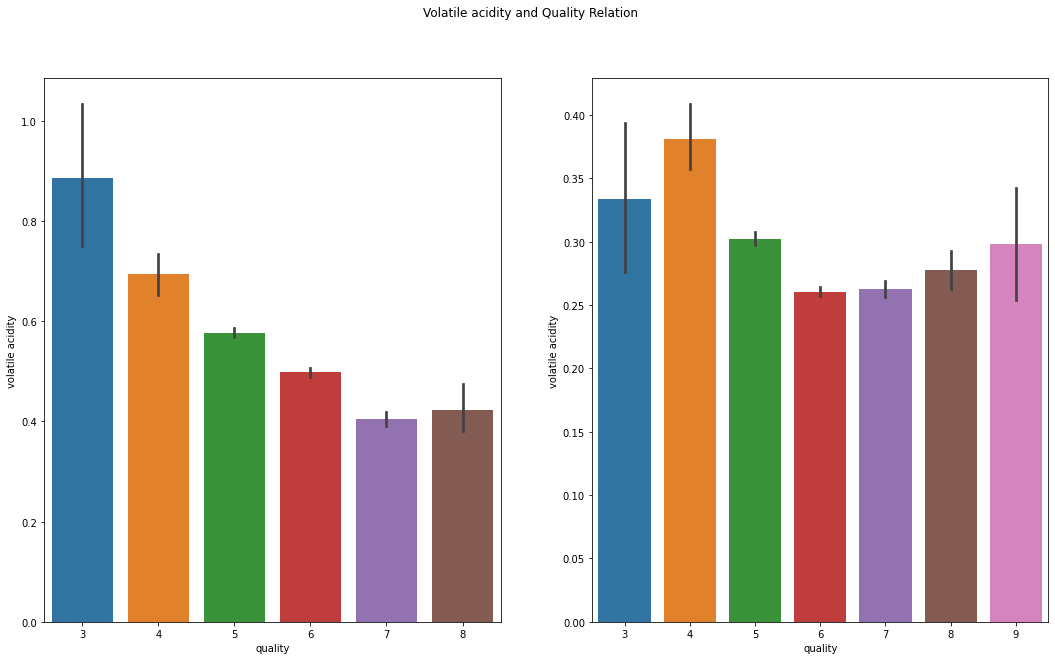

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10))

fig.suptitle('Volatile acidity and Quality Relation')

sns.barplot(ax=axes[0], data=winer, x='quality', y='volatile acidity')
sns.barplot(ax=axes[1], data=winew, x='quality', y='volatile acidity')

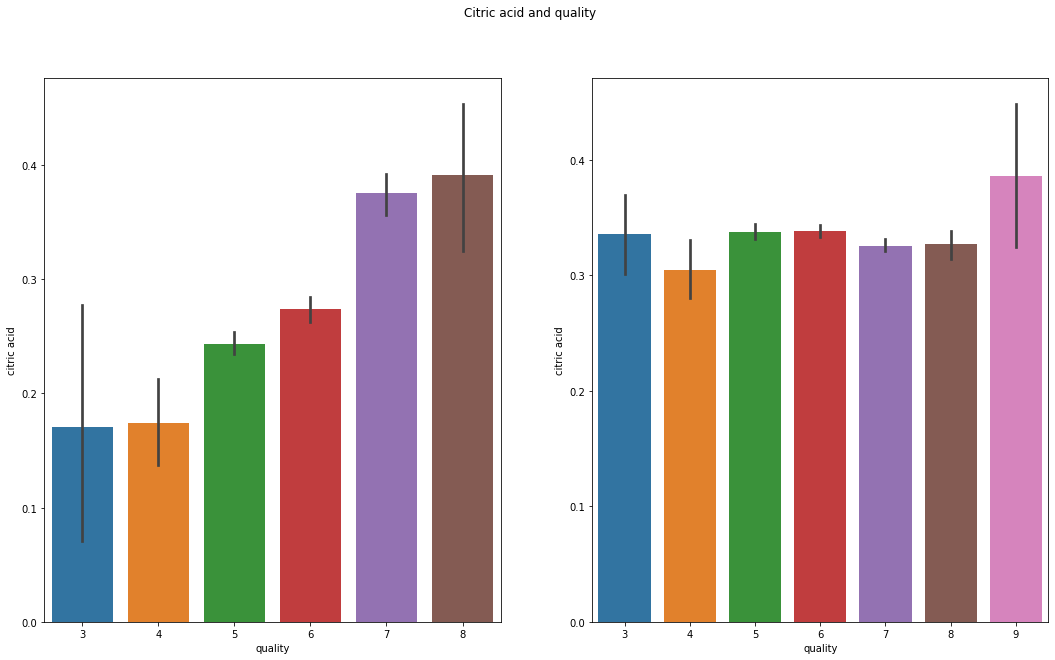

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10))

fig.suptitle('Citric acid and quality')

sns.barplot(ax=axes[0], data=winer, x='quality', y='citric acid')
sns.barplot(ax=axes[1], data=winew, x='quality', y='citric acid')

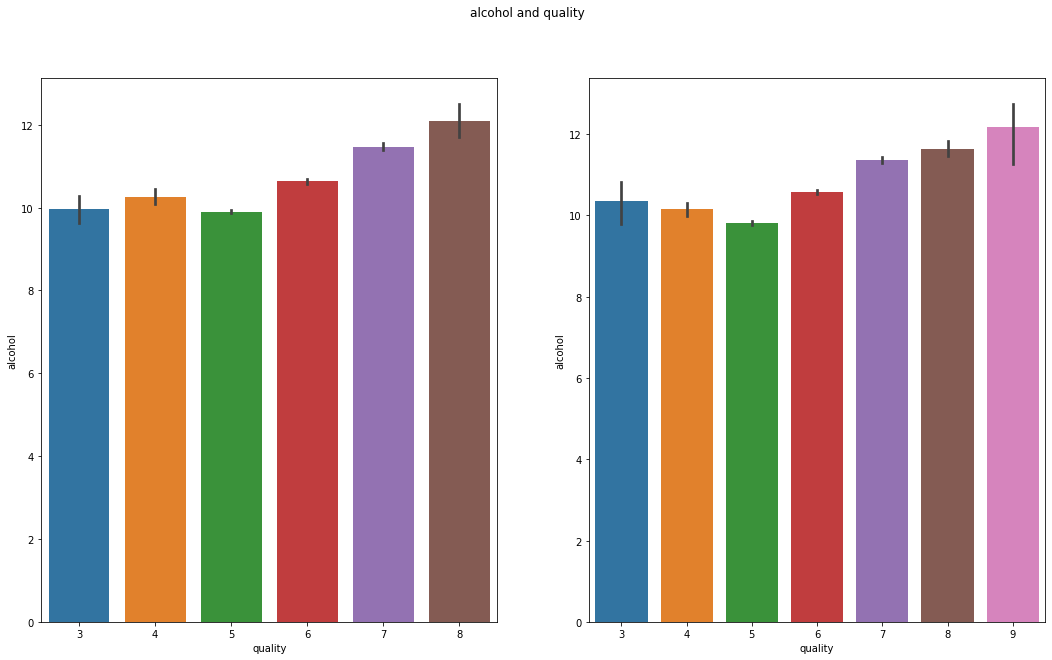

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10))

fig.suptitle('alcohol and quality')

sns.barplot(ax=axes[0], data=winer, x='quality', y='alcohol')
sns.barplot(ax=axes[1], data=winew, x='quality', y='alcohol')

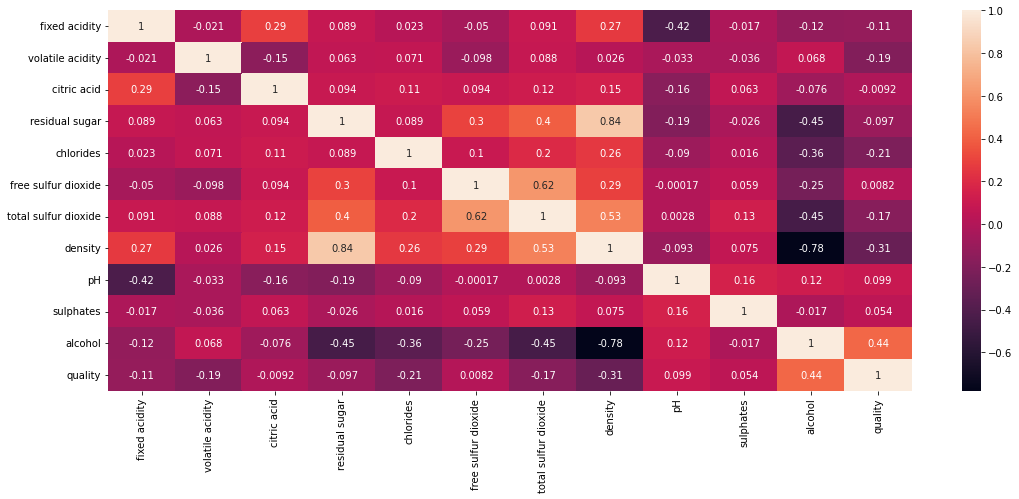

In [27]:

# correlation matrix of white wine

plt.figure(figsize=[18,7])
# plot correlation

sns.heatmap(winew.corr(),annot=True)
plt.show()

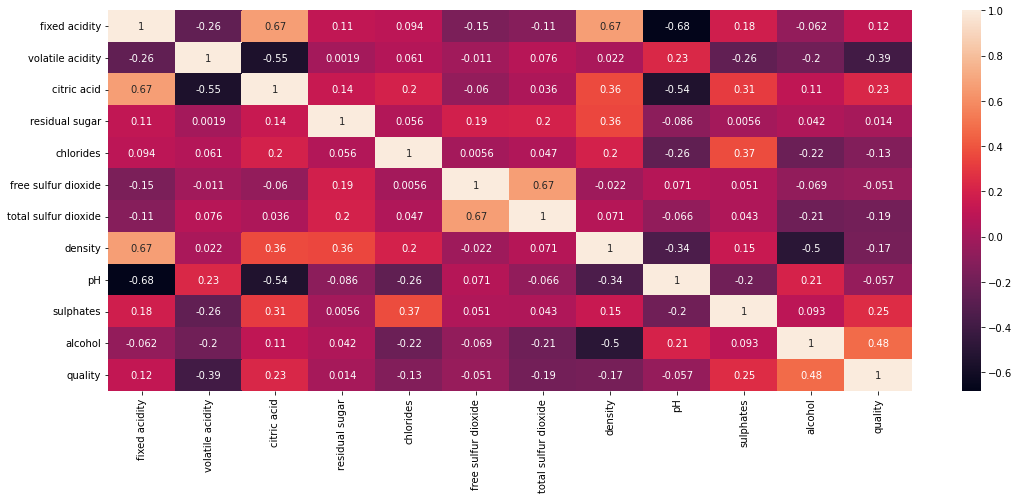

In [28]:
# correlation matrix of red wine

plt.figure(figsize=[18,7])
# plot correlation

sns.heatmap(winer.corr(),annot=True)
plt.show()

In [29]:

X = winew.drop('quality',axis=1)
C = winer.drop('quality',axis=1)

In [30]:
print(X)
print(C)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0          0.270000         0.36            20.7      0.045   
1               6.3          0.300000         0.34             1.6      0.049   
2               8.1          0.280000         0.40             6.9      0.050   
3               7.2          0.230000         0.32             8.5      0.058   
4               7.2          0.230000         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2          0.210000         0.29             1.6      0.039   
4894            6.6          0.320000         0.36             8.0      0.047   
4895            6.5          0.278252         0.19             1.2      0.041   
4896            5.5          0.290000         0.30             1.1      0.022   
4897            6.0          0.210000         0.38             0.8      0.020   

      free sulfur dioxide  

In [31]:
D = winer['quality'].apply(lambda d_value: 1 if d_value>=6.5 else 0)
Y = winew['quality'].apply(lambda y_value: 1 if y_value>=6.5 else 0)

In [32]:
#SPLITTING INTO TRAIN TEST
C_train, C_test, D_train, D_test = train_test_split(C, D, test_size=0.2, random_state=7)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=7)

In [33]:
print(Y.shape, Y_train.shape, Y_test.shape)
print(D.shape, D_train.shape, D_test.shape)

(4898,) (4408,) (490,)
(3198,) (2558,) (640,)


In [34]:
model1 = RandomForestClassifier()
model2 = RandomForestClassifier()

In [35]:
model1.fit(X_train, Y_train)
model2.fit(C_train, D_train)

RandomForestClassifier()

In [36]:
X_test_prediction = model1.predict(X_test)
test_data_accuracyW = accuracy_score(X_test_prediction, Y_test)
C_test_prediction = model2.predict(C_test)
test_data_accuracyR = accuracy_score(C_test_prediction, D_test)

In [37]:
print('Accuracy : ', test_data_accuracyR)
print('Accuracy : ', test_data_accuracyW)

Accuracy :  0.9875
Accuracy :  0.889795918367347


In [38]:
# print('calculating the error')
# # checking mean_squared error
# y_predict = model.predict(Y_test)



# MSE = mean_squared_error(Y_test,y_predict)
 
# # checking root mean squared error

# RMSE = np.sqrt(MSE)
 

# print('mean squared error is : ',MSE)
 

# print('root mean squared error is : ',RMSE)
 

# print(classification_report(Y_test,y_predict))

In [39]:
#quality prediction for red wine
lis=[]
print("enter fixed acidity")
lis.append(eval(input()))
print("enter volatile acidity")
lis.append(eval(input()))
print("enter citric acid")
lis.append(eval(input()))
print("enter residual sugar")
lis.append(eval(input()))
print("enter chlorides")
lis.append(eval(input()))
print("enter free sulfur dioxide")
lis.append(eval(input()))
print("enter total sulfur dioxide")
lis.append(eval(input()))
print("enter density")
lis.append(eval(input()))
print("enter pH")
lis.append(eval(input()))
print("enter sulphates")
lis.append(eval(input()))
print("enter alcohol")
lis.append(eval(input()))
lis = tuple(lis)


input_data_as_numpy_array = np.asarray(lis)
print(input_data_as_numpy_array)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model2.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

enter fixed acidity
8
enter volatile acidity
9
enter citric acid
5
enter residual sugar
9
enter chlorides
25
enter free sulfur dioxide
56
enter total sulfur dioxide
25
enter density
36
enter pH
5
enter sulphates
36
enter alcohol
8.8
[ 8.   9.   5.   9.  25.  56.  25.  36.   5.  36.   8.8]
[0]
Bad Quality Wine


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [40]:
#quality prediction for white wine.

lis1=[]
print("enter fixed acidity")
lis1.append(eval(input()))
print("enter volatile acidity")
lis1.append(eval(input()))
print("enter citric acid")
lis1.append(eval(input()))
print("enter residual sugar")
lis1.append(eval(input()))
print("enter chlorides")
lis1.append(eval(input()))
print("enter free sulfur dioxide")
lis1.append(eval(input()))
print("enter total sulfur dioxide")
lis1.append(eval(input()))
print("enter density")
lis1.append(eval(input()))
print("enter pH")
lis1.append(eval(input()))
print("enter sulphates")
lis1.append(eval(input()))
print("enter alcohol")
lis1.append(eval(input()))
lis1 = tuple(lis)
input_data_as_numpy_array1 = np.asarray(lis1)
print(input_data_as_numpy_array1)
input_data_reshaped1 = input_data_as_numpy_array1.reshape(1,-1)

prediction = model2.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')


enter fixed acidity
1
enter volatile acidity
1
enter citric acid
1
enter residual sugar
1
enter chlorides
1
enter free sulfur dioxide
1
enter total sulfur dioxide
1
enter density
1
enter pH
1
enter sulphates
1
enter alcohol
1
[ 8.   9.   5.   9.  25.  56.  25.  36.   5.  36.   8.8]
[0]
Bad Quality Wine


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [41]:
x_predict = list(model2.predict(X_test))

df = {'predicted':x_predict,'orignal':Y_test}

pd.DataFrame(df).tail(10)

,predicted,orignal
2193,0,0
2000,0,0
3351,0,0
4728,0,0
3935,0,0
2652,1,1
4315,0,1
6,0,0
681,0,0
3763,0,0


In [42]:
from tkinter import *
from tkinter import messagebox
import os

In [43]:
def home_screen():
    root =Tk()
    root.title("GUI")
    root.state('zoomed')
    root.resizable(width = False,height = True)
    root.configure(bg = "gray")
    
    MainFrame = Frame(root, bg = "black")
    MainFrame.pack()
    root_lbl = Label(MainFrame,text = "Wine Quality Prediction",bg = "aqua", fg = "white",font = ('',40,'italic','underline'), width=50, height=2, relief='raised', borderwidth=5)
    root_lbl.pack(anchor = N,expand = True)
    
    q_frame = Frame(MainFrame,bg = 'black', width = 1400, height=800, relief='flat', borderwidth=5)
    q_frame.pack(side = LEFT,anchor = W,expand = True)

    br_file = Label(q_frame,text = "DETAILS OF WINE :",bg = "white",font = ('',24,'italic'),relief = 'flat',width = 20)
    br_file.place(relx = 0.001,rely = 0.001)
    
    
    Label(MainFrame, text='Fixed Acidity',font=('bold',25)).place(relx = 0.1,rely = 0.3)
    e1 = Entry(MainFrame,font=('bold',15))
    e1.place(relx = 0.27, rely = 0.31)
    e1.focus()

    
    Label(MainFrame, text='volatile acidity',font=('bold',25)).place(relx = 0.5,rely = 0.3)
    e2= Entry(MainFrame,font=('bold',15))
    e2.place(relx = 0.68, rely = 0.31)
    e2.focus()
    
    
    Label(MainFrame, text='citric acid',font=('bold',25)).place(relx = 0.1,rely = 0.4)
    e3 = Entry(MainFrame,font=('bold',15))
    e3.place(relx = 0.27, rely = 0.41)
    e3.focus()
    

    
    Label(MainFrame, text='residual sugar',font=('bold',25)).place(relx = 0.5,rely = 0.4)
    e4 = Entry(MainFrame,font=('bold',15))
    e4.place(relx = 0.68,rely = 0.41)
    e4.focus()
    
    
    Label(MainFrame, text='chlorides',font=('bold',25)).place(relx = 0.1,rely = 0.5)
    e5 = Entry(MainFrame,font=('bold',15))
    e5.place(relx = 0.27, rely = 0.51)
    e5.focus()
    
    
    
    Label(MainFrame, text='free sulfur dioxide',font=('bold',25)).place(relx = 0.5,rely = 0.5)
    e6 = Entry(MainFrame,font=('bold',15))
    e6.place(relx = 0.68, rely = 0.51)
    e6.focus()
    
    
    Label(MainFrame, text='total sulfur dioxide',font=('bold',25)).place(relx = 0.1,rely = 0.6)
    e7 = Entry(MainFrame,font=('bold',15))
    e7.place(relx = 0.27, rely = 0.61)
    e7.focus()
    
    
    
    Label(MainFrame, text='density',font=('bold',25)).place(relx = 0.5,rely = 0.6)
    e8 = Entry(MainFrame,font=('bold',15))
    e8.place(relx = 0.68, rely = 0.61)
    e8.focus()
    
    
    
    Label(MainFrame, text='pH',font=('bold',25)).place(relx = 0.1,rely = 0.7)
    e9 = Entry(MainFrame,font=('bold',15))
    e9.place(relx = 0.27, rely = 0.71)
    e9.focus()
    
    
    Label(MainFrame, text='sulphates',font=('bold',25)).place(relx = 0.5,rely = 0.7)
    e10 = Entry(MainFrame,font=('bold',15))
    e10.place(relx = 0.68, rely = 0.71)
    e10.focus()
    
    
    Label(MainFrame, text='Alchohol',font=('bold',25)).place(relx = 0.1,rely = 0.8)
    e11 = Entry(MainFrame,font=('bold',15))
    e11.place(relx = 0.27, rely = 0.81)
    e11.focus()
    
    

    def Predict1():
        fix = e1.get()
        vola = e2.get()
        citri = e3.get()
        resi = e4.get()
        chlro = e5.get()
        free = e6.get()
        sulfur = e7.get()
        density = e8.get()
        ph = e9.get()
        sulpha = e10.get()
        alco = e11.get()
        lis1 = tuple(fix,vola,citri,resi,chlro,free,sulfur,density,ph,sulpha,alco)
        input_data_as_numpy_array1 = np.asarray(lis1)
        input_data_reshaped1 = input_data_as_numpy_array1.reshape(1,-1)

        prediction = model2.predict(input_data_reshaped1)
        if (prediction[0]==1):
            k = 'Bad Quality Wine'
        else:
            k = 'Bad Quality Wine'
        messagebox.showinfo(title="Predict",message=f"Predict is {str(k)}")

   
    
    predict_btn = Button(q_frame,text = "PREDICT",command=Predict1,bg = "gray",font = ('',18,'bold'),relief = 'raised')
    predict_btn.place(relx = 0.38,rely = 0.9)
    
    root.mainloop()


In [44]:
home_screen()

TclError: ignored